# Project 2020
Using Linear Regression I am to determine the power output from a wind turbine based on wind speed, the goal of this is not to simply use scikit's LinearRegression function to simply put a straight line on a plot. While it certainly will be doing that the challenge (and learning opportunity), is to determine how good of a fit the line is and can we improve upon it to be (reasonably) certain we have the best fit.

In [11]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as mod

In [12]:
powerprod_df = pd.read_csv('..\data\powerproduction.csv')
powerprod_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [13]:
powerprod_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [14]:
powerprod_df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


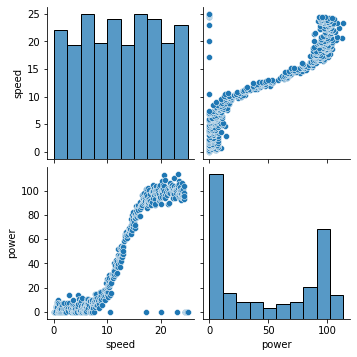

In [15]:
seaborn.pairplot(powerprod_df);

From the pairplot we can see that the shape of power v speed plot is not exactly linear and flattens at low speeds (<10) and high speeds (>20).

Additionally there are a few outlier values which don't really make sense and might hint at a problem with measurement or some other error, this is most noticeable for a few cases where speed is greater than 10 but the power is still at 0.
Unsure at this point whether these values should be included in the model as these values are probably mistakes.

## Trying out sklearn's LinearRegression
[Documentation for sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
[Reshaping Dataframe columns to fit in model]()

In [36]:
#Trying a simple Linear regression without splitting dataset
#Using this realpython article as a reference https://realpython.com/linear-regression-in-python/
X = powerprod_df['speed'].values.reshape(-1,1) #need to convert speed column into a 2d numpy array
y = powerprod_df['power'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

In [26]:
r_sq = reg.score(X, y)
print("r squared for generated model:", r_sq)
print("models intercept:", reg.intercept_)
print("models slope:", reg.coef_)

r squared for generated model: 0.7289360258564072
models intercept: [-13.89990263]
models slope: [[4.91759567]]


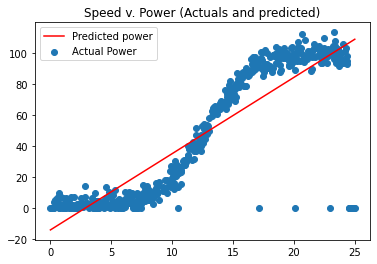

In [27]:
plt.scatter(powerprod_df['speed'],powerprod_df['power'], label='Actual Power')
plt.plot(X, reg.predict(X), 'red', label='Predicted power')
plt.title('Speed v. Power (Actuals and predicted)')
plt.legend()
plt.show();

After this first rough pass at Linear Regression of the windmill data we can see that the line is ok overall, it matches the general shape of the data, but looks like it has a low degree of accuracy for many of the points and seems to give an accurate representation for only the areas where the line intersects the scatter groups.

This line is also probably being skewed by the outlier values of 0 power at higher speeds.

In [28]:
X = powerprod_df['speed'].values.reshape(-1,1)
y = powerprod_df['power'].values.reshape(-1,1)
#using train_test_split to split out my dataset to training and testing
X_train, X_test, y_train, y_test = mod.train_test_split(
    X, y, test_size=0.33, random_state=42)

In [29]:
#use training data to fit the model
reg_train = LinearRegression().fit(X_train, y_train)

In [30]:
#get predictions for y using the test data
y_pred = reg_train.predict(X_test)

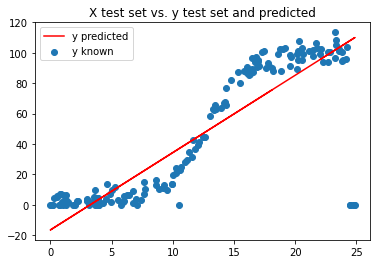

In [31]:
#plot the test data for X vs the test data for y 
#overlay the test data for X vs the predicted data for y
plt.scatter(X_test,y_test, label='y known')
plt.plot(X_test, y_pred, label='y predicted', color='red')
plt.title('X test set vs. y test set and predicted')
plt.legend()
plt.show()

In [32]:
r_sq = reg_train.score(X_test, y_test)
print("r squared for generated model:", r_sq)
print("models intercept:", reg_train.intercept_)
print("models slope:", reg_train.coef_)

r squared for generated model: 0.6950401996553021
models intercept: [-16.47804425]
models slope: [[5.0857491]]


We can see this model doesn't perform quite as well as the first one but this makes sense as it is missing 33% of the overall points, next steps will be to start validating this model and seeing what improvements can be made